<a href="https://colab.research.google.com/github/jamal221/Machine_Learning_Project/blob/main/FBProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from prophet import Prophet

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir("/content/drive/My Drive/Colab Notebooks/CSV_Files/")

In [7]:
data = pd.read_csv('AirPassengers.csv')
data.head()

,Month,AirPassengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [8]:
data.dtypes

Month            object
AirPassengers     int64
dtype: object

In [ ]:
data['Month'] = pd.DatetimeIndex(data['Month'])# Convert Object to time in dataframe
data.head()

,Month,AirPassengers
0,1949-01-01,112
1,1949-02-01,118
2,1949-03-01,132
3,1949-04-01,129
4,1949-05-01,121


In [ ]:
data.dtypes

Month            datetime64[ns]
AirPassengers             int64
dtype: object

In [ ]:
data.set_index('Month')

,AirPassengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121
...,...
1960-08-01,606
1960-09-01,508
1960-10-01,461


<AxesSubplot:xlabel='Month'>

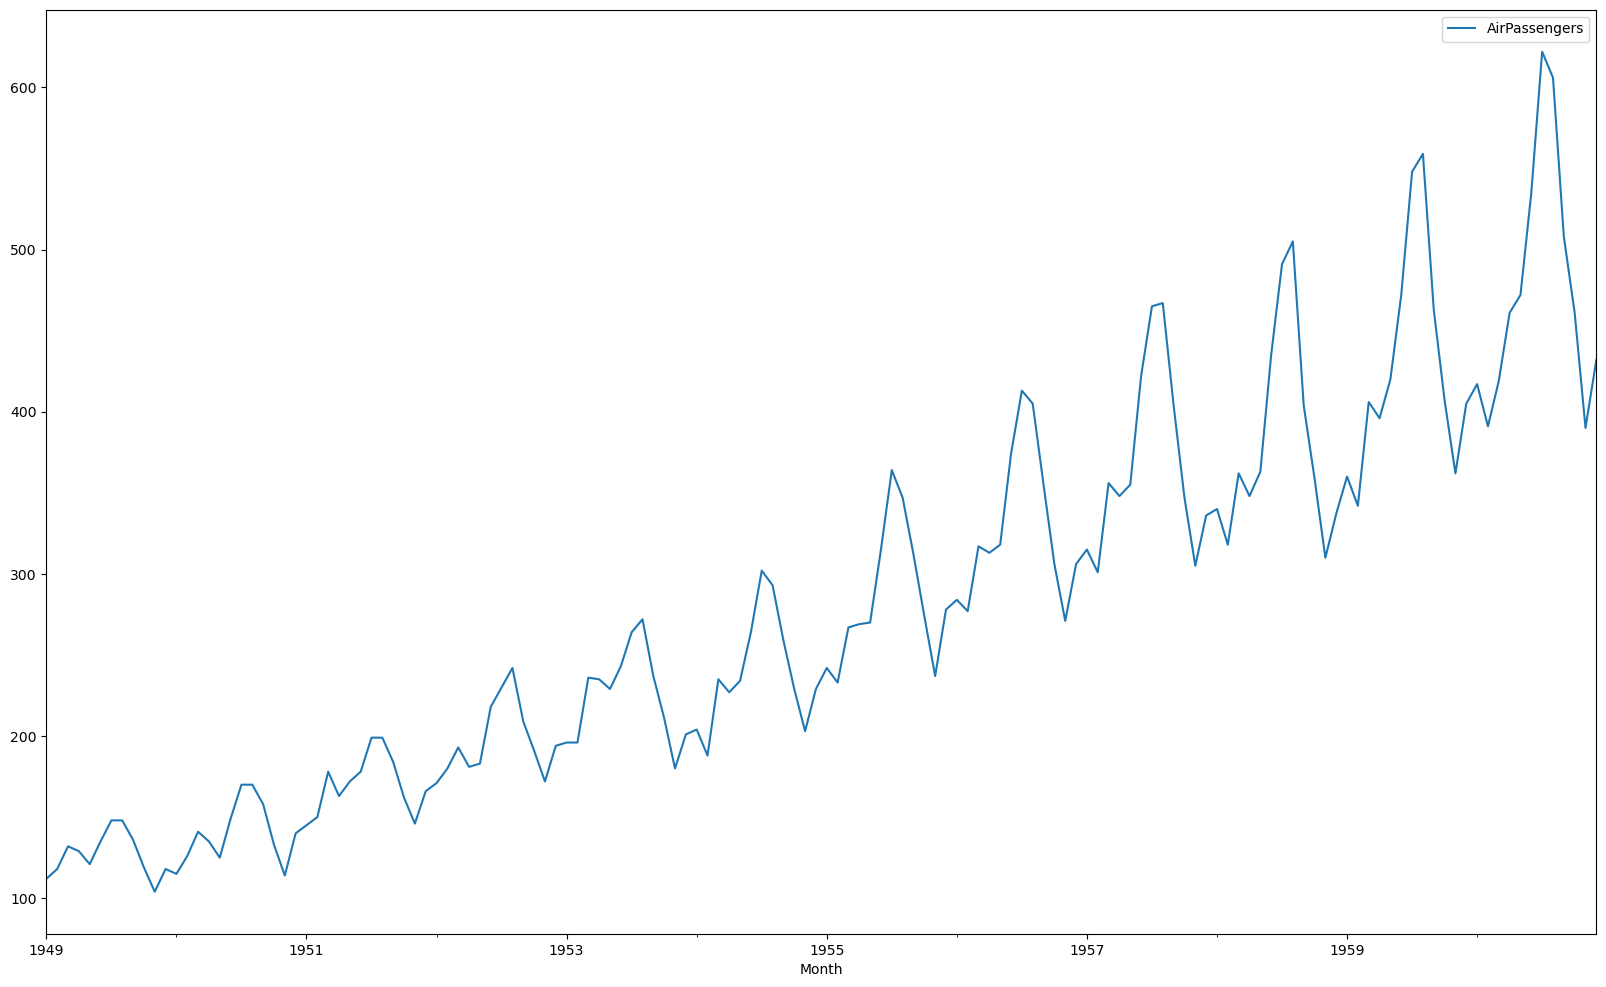

In [ ]:
data.set_index('Month').plot(figsize=(20, 12))# the best way for plotting

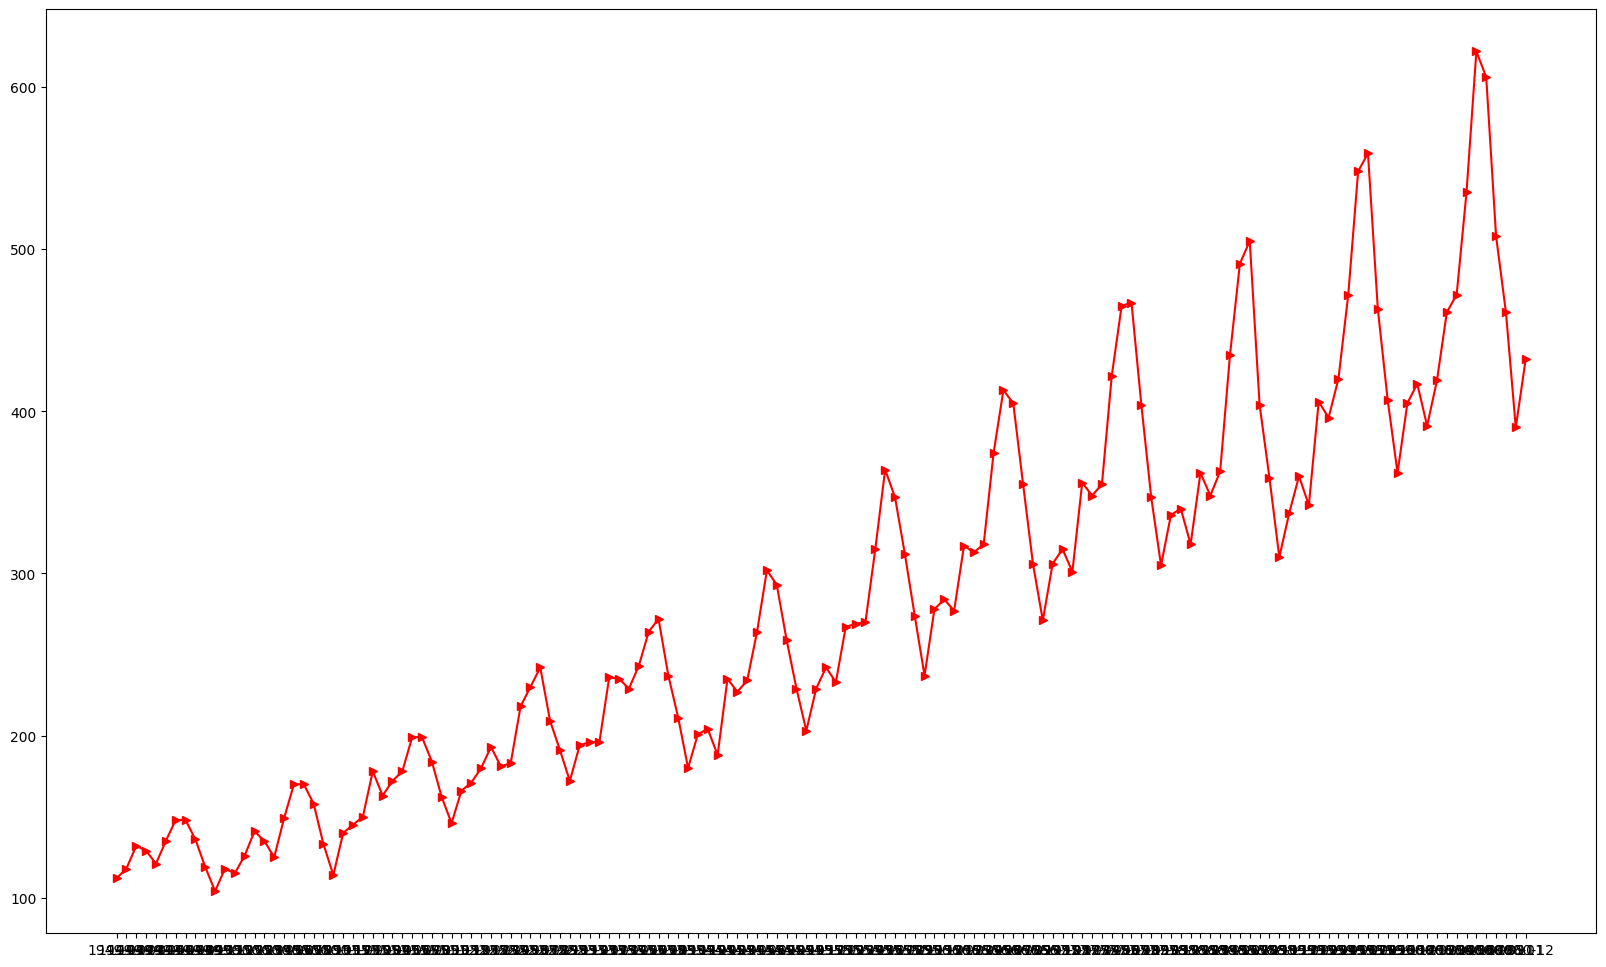

In [9]:
plt.figure(figsize=(20, 12))
plt.plot(data['Month'], data['AirPassengers'], 'r>-')

In [10]:
p = Prophet()

In [11]:
data = data.rename(columns={# In prophet the feature  column is ds and the target column is y
    'Month': 'ds',
    'AirPassengers': 'y'
})
data.head()

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [12]:
data.tail()

,ds,y
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390
143,1960-12,432


In [13]:
p.fit(data)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv5pjl4e4/w6hqvgpr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpv5pjl4e4/u9b0jndy.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=50823', 'data', 'file=/tmp/tmpv5pjl4e4/w6hqvgpr.json', 'init=/tmp/tmpv5pjl4e4/u9b0jndy.json', 'output', 'file=/tmp/tmpv5pjl4e4/prophet_modelq2fxmeoj/prophet_model-20230814073255.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
07:32:55 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
07:32:55 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [14]:
future = p.make_future_dataframe(periods=36, freq='MS')# the previous data has 144 rows this period include 36 month and overall is 144+36=180 rows
future# Infact the new month start from 1361/01/01 to 1363/12/01 with index 179

,ds
0,1949-01-01
1,1949-02-01
2,1949-03-01
3,1949-04-01
4,1949-05-01
...,...
175,1963-08-01
176,1963-09-01
177,1963-10-01
178,1963-11-01


In [15]:
data

,ds,y
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
...,...,...
139,1960-08,606
140,1960-09,508
141,1960-10,461
142,1960-11,390


In [16]:
forecast = p.predict(future)

In [17]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1949-01-01,107.398252,57.266749,115.212225,107.398252,107.398252,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,-21.393308,0.0,0.0,0.0,86.004944
1,1949-02-01,109.544420,47.636579,109.716384,109.544420,109.544420,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,-30.060620,0.0,0.0,0.0,79.483800
2,1949-03-01,111.482895,81.952245,137.626946,111.482895,111.482895,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,-0.469818,0.0,0.0,0.0,111.013077
3,1949-04-01,113.629063,79.768260,136.990885,113.629063,113.629063,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,-4.917723,0.0,0.0,0.0,108.711340
4,1949-05-01,115.706000,84.397957,141.473434,115.706000,115.706000,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,-3.618250,0.0,0.0,0.0,112.087749
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175,1963-08-01,582.644882,621.952621,679.127311,579.635545,585.283325,67.607366,67.607366,67.607366,67.607366,67.607366,67.607366,0.0,0.0,0.0,650.252248
176,1963-09-01,585.770722,575.584258,630.758186,582.605688,588.513331,17.234595,17.234595,17.234595,17.234595,17.234595,17.234595,0.0,0.0,0.0,603.005317
177,1963-10-01,588.795728,537.827486,594.263784,585.483288,591.701692,-22.023296,-22.023296,-22.023296,-22.023296,-22.023296,-22.023296,0.0,0.0,0.0,566.772432
178,1963-11-01,591.921568,507.038174,564.606944,588.489253,594.980750,-56.971509,-56.971509,-56.971509,-56.971509,-56.971509,-56.971509,0.0,0.0,0.0,534.950059


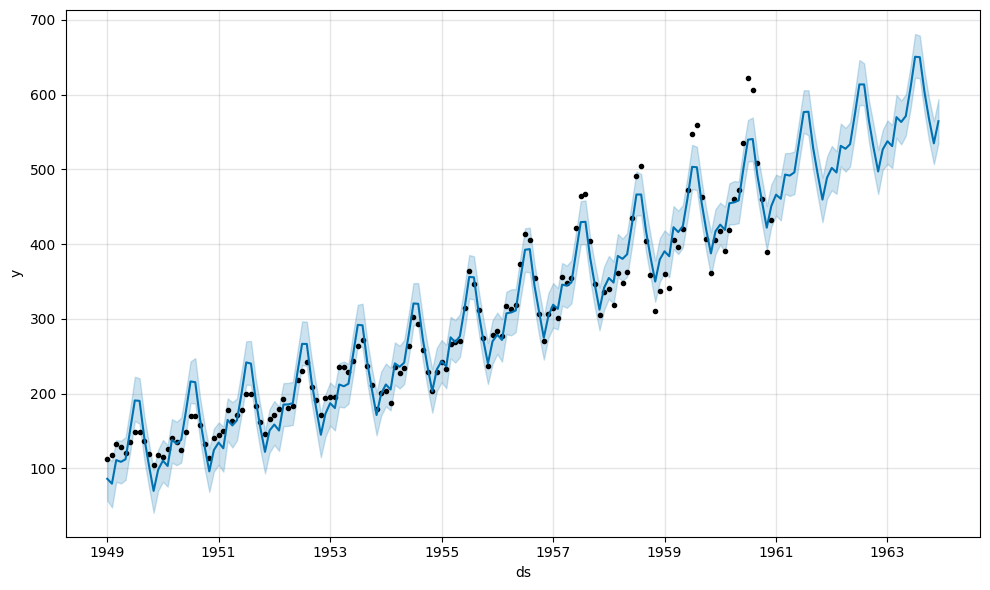

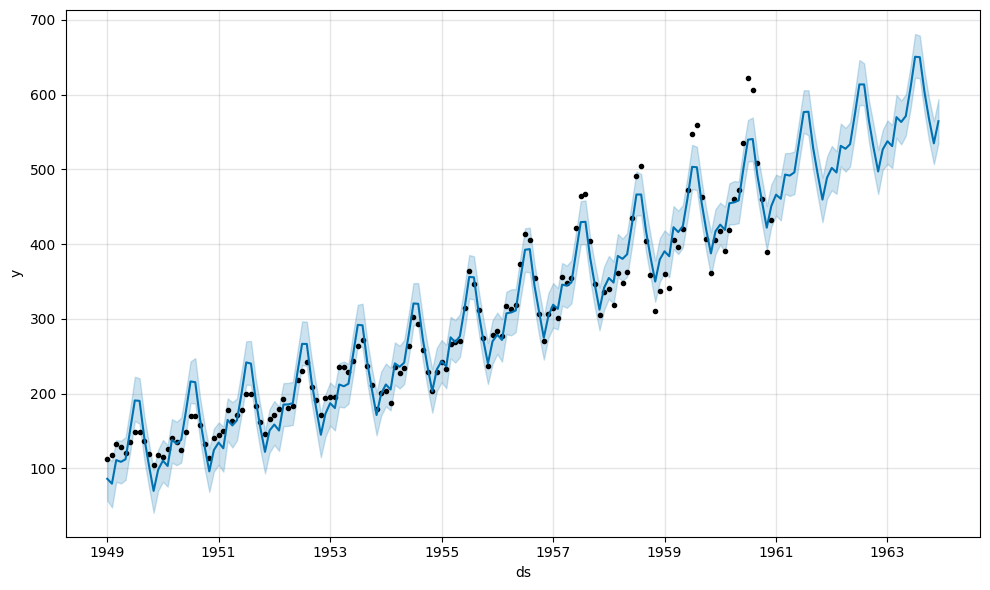

In [18]:
p.plot(forecast, uncertainty=True)